ETF DASHBOARD V.2.0

# | Portfolio Surveillance - Position Management (POC) 
- *This is POC for further improvement V3 along with AlgoTrading Integration

In [3]:
# Author: Ken Lee and Albert 2020.01.12
import pandas as pd
import os
import json
import requests
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from pathlib import Path
import sqlalchemy as sql
import pandas as pd
from datetime import date
import logging
import numpy as np
#Our Library
import ETFHistoryDownload as hist
import ETFStockAnalytics as analytic
import ETFPerformanceForecast as perf
from MCForecastTools import MCSimulation
import datetime
from datetime import datetime
from dateutil.relativedelta import relativedelta
# DB Connection
eft_data_connection_string = 'sqlite:///./Resources/etf.db'
our_portfolio_export = Path('./Resources/our_portfolio.csv')
etf_data_engine = sql.create_engine(eft_data_connection_string, echo=True)

## STEP1. OUR PORFTFOLIO PERFORMANCE

In [20]:
# Load Fresh_rolling_train Data for ML Training
sql_query = """
SELECT distinct symbol as symbol
FROM 'OUR_PORTFOLIO_LIST'
UNION
SELECT 'SPY'
"""
our_portfolio_list = pd.read_sql_query(sql_query, eft_data_connection_string)
our_portfolio_list = our_portfolio_list.set_index('symbol')  
symbol_list = []
for symbol in our_portfolio_list.index:
    symbol_list.append(symbol)


print(symbol_list)

['ACN', 'AMAT', 'AMD', 'APPS', 'ARWR', 'CBRE', 'DE', 'DHR', 'DOCU', 'EL', 'EPAM', 'FB', 'GE', 'GOOG', 'GOOGL', 'GS', 'IRT', 'KEYS', 'KLAC', 'LCII', 'LIN', 'LRCX', 'LSCC', 'LULU', 'MPWR', 'MRVL', 'MSFT', 'MU', 'NEO', 'NXPI', 'PAYC', 'PLD', 'POOL', 'QCOM', 'QQQ', 'QRVO', 'RH', 'ROKU', 'SAIA', 'SEDG', 'SNBR', 'SNPS', 'SPY', 'STX', 'SWKS', 'TER', 'TGT', 'TSLA', 'UPS', 'VICR', 'WST', 'XLK', 'YETI']


In [36]:
t_date = datetime(2020, 1, 2) 
x_start_date = '2020-01-02'
x_end_date = '2020-12-31'
y_end_date = '2021-12-31'
        
daily_xy_horizon_return_matrix = analytic.get_xy_daily_return_matrix(t_date, x_start_date, x_end_date, y_end_date)
our_portfolio = daily_xy_horizon_return_matrix[daily_xy_horizon_return_matrix.index.isin(symbol_list)]
our_portfolio = our_portfolio.rename(columns={'Start Date':'Acquisition Date'})
display(our_portfolio)
display(our_portfolio.describe())

period,D0,D7_W1,M1,M3,M6,Y0_YTD,Y1,Y2,Y3,Acquisition Date,Start Cost,X_End Date,X_End Close,X_Return,Y_End Date,Y_End Close,Y_Return,XY_Return
symbol,,,,,,,,,,,,,,,,,,
ACN,372.99,212.0500,199.620,184.890,188.600,210.150,140.3800,153.8300,144.0500,2020-01-02,140.3800,2020-12-31,188.600,0.343496,2021-12-31,372.99,1.657002,0.977678
AMAT,149.57,61.3200,56.700,49.460,44.660,62.210,33.4600,53.0400,56.5500,2020-01-02,33.4600,2020-12-31,44.660,0.334728,2021-12-31,149.57,3.470114,2.349082
AMD,132.00,46.6400,38.730,28.320,31.260,49.110,18.8150,10.9900,11.1200,2020-01-02,18.8150,2020-12-31,31.260,0.661440,2021-12-31,132.00,6.015679,3.222649
APPS,53.07,8.0800,8.530,6.050,5.105,7.310,1.8799,1.7909,1.5700,2020-01-02,1.8799,2020-12-31,5.105,1.715570,2021-12-31,53.07,27.230225,9.395690
ARWR,59.53,66.9800,63.320,28.910,26.355,63.140,13.0500,3.7250,3.7050,2020-01-02,13.0500,2020-12-31,26.355,1.019540,2021-12-31,59.53,3.561686,1.258774
CBRE,103.42,61.2700,56.520,49.470,52.250,61.470,39.8700,NaN,NaN,2020-01-02,39.8700,2020-12-31,52.250,0.310509,2021-12-31,103.42,1.593930,0.979330
DE,379.87,174.8500,165.330,163.250,165.120,176.880,147.8199,157.9800,135.0300,2020-01-02,147.8199,2020-12-31,165.120,0.117035,2021-12-31,379.87,1.569816,1.300569
DHR,303.01,152.8100,145.780,137.160,144.140,155.190,100.4050,92.4700,93.1300,2020-01-02,100.4050,2020-12-31,144.140,0.435586,2021-12-31,303.01,2.017878,1.102192
DOCU,136.16,74.5000,69.890,60.790,51.350,75.900,40.6500,NaN,NaN,2020-01-02,40.6500,2020-12-31,51.350,0.263223,2021-12-31,136.16,2.349569,1.651607


period,D0,D7_W1,M1,M3,M6,Y0_YTD,Y1,Y2,Y3,Start Cost,X_End Close,X_Return,Y_End Close,Y_Return,XY_Return
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,50.000000,50.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,354.752453,179.459438,167.682736,149.129717,142.714717,179.921981,117.486213,130.247040,125.571802,117.486213,142.714717,0.408069,354.752453,3.179326,1.860171
std,517.962959,252.182537,237.925429,217.004783,206.059726,253.409901,196.161992,205.515293,200.311623,196.161992,206.059726,0.381494,517.962959,3.870581,1.643865
min,24.220000,8.080000,8.530000,6.050000,5.105000,7.310000,1.879900,1.790900,1.570000,1.879900,5.105000,-0.275115,24.220000,0.863060,0.220106
25%,132.000000,61.320000,59.340000,49.470000,47.410000,62.210000,33.460000,43.112500,37.975000,33.460000,47.410000,0.210824,132.000000,1.593930,0.977678
50%,221.900000,122.280000,114.770000,102.640000,90.870000,121.620000,66.800000,83.175000,82.210000,66.800000,90.870000,0.316925,221.900000,2.043809,1.335325
75%,379.870000,212.050000,199.620000,180.180000,180.870000,210.150000,123.230000,130.155000,121.605000,123.230000,180.870000,0.467743,379.870000,3.561686,2.297127
max,2774.230000,1362.160000,1289.770000,1177.410000,1112.860000,1368.680000,1053.240000,1073.440000,1049.540000,1053.240000,1112.860000,1.860437,2774.230000,27.230225,9.395690


In [ ]:
## STEP2. POSITION MANAGEMENT (POC)

In [ ]:
#for symbol in symbol_list:
# Specifiy Trading Start Date
trading_start_date = datetime(2020, 1, 2) 
TRADING_START_DATE = trading_start_date
TRADING_END_DATE = TRADING_START_DATE + relativedelta(days=100)
short_window = 40
long_window = 100

for symbol in symbol_list:
    
    #read price History
    sql_query = f"""
    Select date, close FROM PX_HISTORY where symbol = '{symbol}' and date > '{TRADING_START_DATE.strftime("%Y-%m-%d")}'
    """
    price_df = pd.read_sql_query(sql_query, eft_data_connection_string)
    price_df = price_df.sort_values(by=['date'])
    price_df = price_df.set_index('date')
    price_df = price_df.dropna()

    # Initialize the `signals` DataFrame with the `signal` column
    #price_df = pd.DataFrame(index=price_df.index)
    price_df['signal'] = 0.0

    # Create short simple moving average over the short window
    price_df['short_mavg'] = price_df['close'].rolling(window=short_window, min_periods=1, center=False).mean()

    # Create long simple moving average over the long window
    price_df['long_mavg'] = price_df['close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Create signals
    price_df['signal'][short_window:] = np.where(price_df['short_mavg'][short_window:] 
                                            > price_df['long_mavg'][short_window:], 1.0, 0.0)   

    # Generate trading orders
    price_df['positions'] = price_df['signal'].diff()

    # Print `signals`
    print(price_df)
    
    # Set the initial capital
    initial_capital= float(1000000.0)

    # Create a DataFrame `positions`
    positions = pd.DataFrame(index=price_df.index).fillna(0.0)

    # Buy a 100 shares
    positions['position'] = price_df['signal'] * 100
  
    # Initialize the portfolio with value owned   
    portfolio = positions.multiply(price_df['close'], axis=0)

    # Store the difference in shares owned 
    pos_diff = price_df.diff()

    # Add `holdings` to portfolio
    portfolio['holdings'] = (positions.multiply(price_df['close'], axis=0)).sum(axis=1)

    # Add `cash` to portfolio
    portfolio['cash'] = initial_capital - (pos_diff.multiply(price_df['close'], axis=0)).sum(axis=1).cumsum()   

    # Add `total` to portfolio
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']

    # Add `returns` to portfolio
    portfolio['returns'] = portfolio['total'].pct_change()
    portfolio = portfolio.dropna()
    # Print the first lines of `portfolio`
    print(portfolio.head())
    
    # Import the `pyplot` module as `plt`
    import matplotlib.pyplot as plt

    # Create a figure
    fig = plt.figure()

    ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

    # Plot the equity curve in dollars
    portfolio['total'].plot(ax=ax1, lw=2.)

    ax1.plot(portfolio.loc[price_df.positions == 1.0].index, 
         portfolio.total[price_df.positions == 1.0],
         '^', markersize=10, color='m')
    ax1.plot(portfolio.loc[price_df.positions == 0].index, 
         portfolio.total[price_df.positions == -1.0],
         'v', markersize=10, color='k')

    # Show the plot
    plt.show()
    
    display(pd.DataFrame(portfolio).head())

# STEP3. PERFORMANCE COMPARISON -  OURS VS. BENCHMARKS 
Compare Our portfolio performance vs. benchmarks (ETFs, SPY(S&P 500), QQQ(Nasdaq 100) with Past 2 years history

<AxesSubplot:title={'center':'Volatility Analysis of OURS vs. Benchmarks'}>

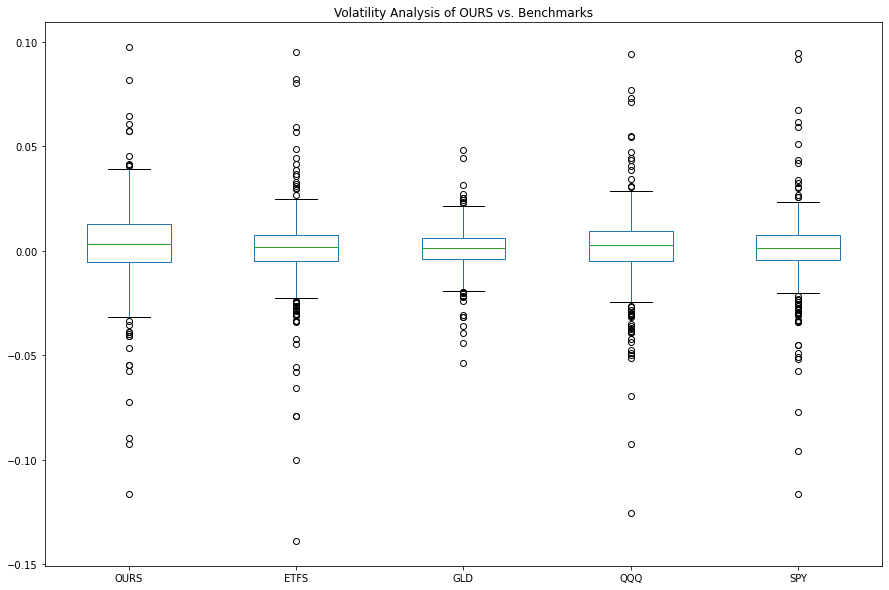

In [32]:
# Based on 2 year history
start_date = datetime(2018, 12, 31)
end_date = datetime(2020, 12,31)
# 1. Calculate daily return of 4 portfolios, our portfolio, ETF combined, SPY, QQQ
agg_daily_return_matrix = perf.get_combined_agg_daily_return(start_date, end_date, our_portfolio, etf_list_df, etf_benchmark_df)
agg_daily_return_matrix.plot(kind='box',figsize=(15,10),title='Volatility Analysis of OURS vs. Benchmarks')

<AxesSubplot:title={'center':'Cumulative Returns of OURS vs. Benchmarks'}, xlabel='date'>

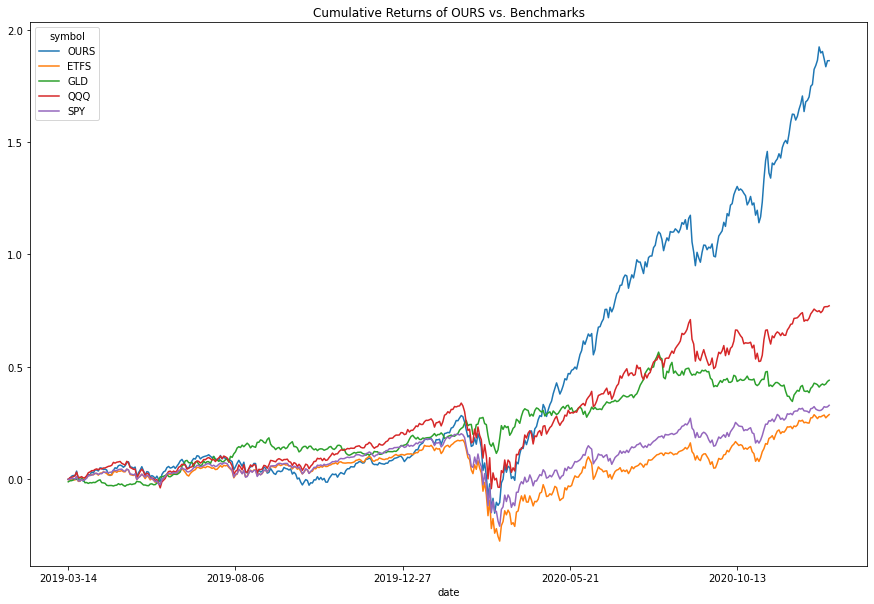

In [33]:
# 2. Calculate cumulative return of 4 portfolios
agg_cumulative_return_matrix = analytic.get_cumulative_return_matrix(agg_daily_return_matrix)
agg_cumulative_return_matrix

#Plot cumulative Return Chart
agg_cumulative_return_matrix.plot(figsize=(15,10), title="Cumulative Returns of OURS vs. Benchmarks")

<AxesSubplot:title={'center':'Rolling 30-Day Standard Deviation of Daily Returns - 4 OURS vs. Benchmarks'}, xlabel='date'>

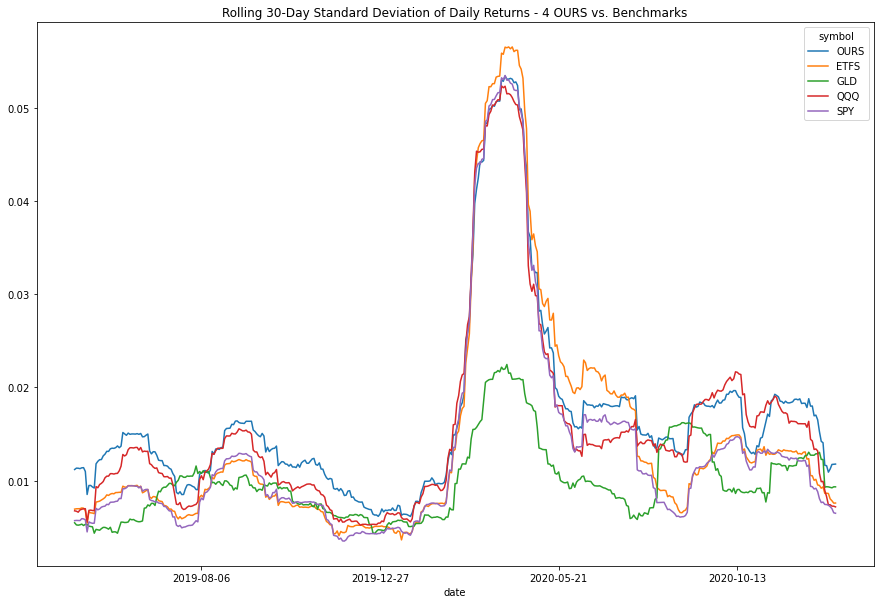

In [34]:
agg_daily_return_matrix.rolling(window=30).std().plot(figsize=(15,10), title='Rolling 30-Day Standard Deviation of Daily Returns - 4 OURS vs. Benchmarks')

In [77]:
agg_cumulative_return_matrix

symbol,OURS,ETFS,GLD,QQQ,SPY
date,,,,,
2019-11-07,0.007890,-0.000113,-0.015591,0.003404,0.003516
2019-11-08,0.008927,0.001052,-0.021926,0.007509,0.005958
2019-11-11,0.005893,0.001082,-0.024418,0.006058,0.004070
2019-11-12,0.007578,0.000506,-0.021570,0.008811,0.005861
2019-11-13,0.002342,0.002180,-0.017726,0.008110,0.006284
...,...,...,...,...,...
2021-11-03,1.640005,0.520282,0.180181,0.968636,0.513088
2021-11-04,1.644259,0.520602,0.193564,0.993692,0.520023
2021-11-05,1.668161,0.530816,0.208941,0.995344,0.525330


- As shown above charts, our portfolio is very volitile comparing benchmark portfolios ==>  riskier = higher return
- During past 2 years horizon, 1st one year(2019/11/07 - 2020/11/07) is underperform, then recent 1 year start out-performing and generating higher return 
  since we pick names based on the recent 1 year performance analysis

In [36]:
agg_performance_summary = perf.get_agg_portfolio_summary(agg_daily_return_matrix, year_trading_days, rolling_days)
agg_performance_summary

,Annualized_std_dev,Annualized_return,Sharpe_ratios,Beta to SP500
symbol,,,,
OURS,0.307405,0.629335,2.047247,1.154436
ETFS,0.289961,0.182263,0.628578,0.999918
GLD,0.165752,0.215464,1.299919,-0.074183
QQQ,0.287574,0.357842,1.244348,1.154487
SPY,0.267179,0.193090,0.722701,1.000000


- Our Performance Summary: Sharpe Ratio: 1.46% and Beta to SP500: 1.275, even higher than 2nd outperformer - QQQ (Nasdaq 100) 

# STEP4. FORECAST PERFORMANCE -- MonteCarlo Simulation

In [18]:
# Convert 2YR AGG Daily Return into 100 Par-based Price into Conolidated Alpaca format to run MCForecast Tool
agg_daily_price_in_format = perf.get_agg_historical_prices(start_date, end_date, agg_daily_return_matrix, "OURS")
agg_daily_price_in_format

C:\programdata\anaconda3\envs\dev\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,OURS,ETFS,GLD,QQQ,SPY
,close,close,close,close,close
date,,,,,
2019-11-07 00:00:00-05:00,100.788989,99.988654,98.440948,100.340426,100.351631
2019-11-08 00:00:00-05:00,100.892707,100.105231,97.807361,100.750939,100.595819
2019-11-11 00:00:00-05:00,100.589324,100.108172,97.558197,100.605757,100.406981
2019-11-12 00:00:00-05:00,100.757798,100.050570,97.842956,100.881101,100.586052
2019-11-13 00:00:00-05:00,100.234222,100.218001,98.227380,100.811014,100.628378
...,...,...,...,...,...
2021-11-03 00:00:00-04:00,264.000512,152.028175,118.018082,196.863579,151.308849
2021-11-04 00:00:00-04:00,264.425869,152.060176,119.356446,199.369212,152.002344


In [20]:
# For Comparison, forecast 100% weight individually for next 10 years with 500 siumulations
ours_ten_years_simulation = MCSimulation(
    portfolio_data=agg_daily_price_in_format[["OURS"]],
    weights=[1.0],
    num_simulation=500,
    num_trading_days=252*10,
)

etf_ten_years_simulation = MCSimulation(
    portfolio_data=agg_daily_price_in_format[["ETFS"]],
    weights=[1.0],
    num_simulation=500,
    num_trading_days=252*10,
)

spy_ten_years_simulation = MCSimulation(
    portfolio_data=agg_daily_price_in_format[["SPY"]],
    weights=[1.0],
    num_simulation=500,
    num_trading_days=252*10,
)

qqq_ten_years_simulation = MCSimulation(
    portfolio_data=agg_daily_price_in_format[["QQQ"]],
    weights=[1.0],
    num_simulation=500,
    num_trading_days=252*10,
)

gld_ten_years_simulation = MCSimulation(
    portfolio_data=agg_daily_price_in_format[["GLD"]],
    weights=[1.0],
    num_simulation=500,
    num_trading_days=252*10,
)


In [21]:
ours_ten_years_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985882,1.052355,1.011568,1.020907,0.988187,0.979329,1.028536,0.962291,1.000830,1.034462,...,1.001195,1.011497,1.010602,0.996425,0.997965,1.008308,0.993982,0.986129,1.032511,0.984099
2,1.027962,1.027862,1.000421,1.065760,0.973185,0.968270,1.066037,0.936860,0.961343,1.065326,...,1.017267,1.052933,1.038729,0.973377,1.041507,0.999094,1.012194,0.974412,1.030821,1.000071
3,1.005801,1.048451,0.960589,1.088957,0.925876,0.969345,1.057745,0.946637,0.996223,1.087189,...,1.023110,1.056145,1.052361,1.051876,1.016922,1.030289,0.999537,1.010914,1.013528,1.026561
4,0.985498,1.020338,0.978627,1.055000,0.907846,0.984084,1.089345,0.954161,0.996485,1.123635,...,0.989133,1.070703,1.062279,1.075120,1.002681,1.001952,1.002123,1.038988,1.060921,1.076979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1509.352533,349.038926,15.285391,116.342508,31.326783,146.836557,7.232896,501.242597,914.180971,26.206432,...,203.629864,260.992465,150.723870,170.629345,49.970735,38.334523,505.241018,42.369338,255.665227,457.235822
2517,1521.172073,348.016002,15.392896,115.976956,32.270830,140.635566,7.165063,492.983761,900.487760,26.352651,...,210.825730,260.868575,150.488520,166.123246,50.431716,39.097910,501.240483,43.127036,264.169769,458.662020
2518,1511.215746,351.539212,15.837931,116.694884,32.807519,142.474613,7.157444,491.338036,910.825763,26.275355,...,204.342604,259.266348,153.919535,171.446923,50.204319,36.755157,519.881147,43.913805,265.212383,476.744561
2519,1500.765933,346.049691,15.060663,114.760527,32.350789,142.638710,7.028066,491.323432,938.973426,26.116091,...,201.953814,251.193475,157.806899,166.858358,51.714228,37.139685,506.661992,42.392638,260.229549,465.945556


In [22]:
etf_ten_years_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006517,0.991219,1.002982,0.952702,1.002181,1.029419,0.998339,1.032944,1.003711,0.998079,...,1.017029,0.994821,1.007463,0.996293,1.009016,0.998975,0.989310,0.987002,1.008017,1.016911
2,1.038527,0.987927,1.003016,0.945925,0.982834,1.050327,1.002148,1.064454,1.017528,0.991618,...,0.972576,0.991097,0.985559,0.983202,0.981135,0.982219,0.976599,0.992745,1.004319,1.020403
3,1.025685,0.972173,1.015614,0.908568,0.990041,1.061585,0.999453,1.034110,1.006207,1.003613,...,1.007002,0.991336,0.980814,0.962648,0.958810,0.976427,0.981534,1.000943,1.027846,1.008688
4,1.011724,0.971380,1.022306,0.926760,0.967995,1.061952,0.998254,1.015888,1.017278,0.995036,...,1.025964,1.008937,0.937807,0.954896,0.953030,0.966143,0.986589,0.976007,1.015247,0.994584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,44.764594,12.006781,5.610955,4.696499,9.542134,8.872919,5.540571,19.042599,4.195080,8.572318,...,2.109421,1.036189,6.636829,5.832071,3.409197,0.960411,6.032403,10.776213,4.915226,7.738337
2517,44.177140,11.864306,5.638048,4.617137,9.320474,8.772177,5.786617,19.138798,4.179582,8.783233,...,2.112929,1.057440,6.664706,5.932986,3.483732,0.949152,6.065742,10.976087,4.907796,7.560363
2518,44.165032,11.971681,5.581677,4.597773,9.618470,8.549951,5.874106,19.805583,4.204193,8.780925,...,2.184504,1.080011,6.659479,5.862766,3.522293,0.931148,6.114394,11.045601,4.803025,7.279487
2519,44.280087,12.045274,5.526194,4.575469,9.434018,8.434079,6.084716,19.015054,4.247592,8.967619,...,2.164771,1.081468,6.604161,5.846419,3.616667,0.927235,5.983380,10.985399,4.849113,7.276291


In [23]:
spy_ten_years_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013453,1.003420,0.996820,1.004184,0.990690,1.011106,0.977288,1.008877,0.986198,0.992354,...,1.010345,0.999056,1.018936,1.001151,1.006715,0.984134,0.983511,1.003006,0.999831,0.996417
2,1.002780,0.989802,0.969527,1.024355,1.006252,1.008876,0.966526,1.017597,0.991310,1.015570,...,1.002671,1.000385,1.010351,1.000674,0.979663,0.985417,1.010109,1.003154,0.985770,0.961121
3,0.965294,0.980589,1.004484,1.008783,1.003703,1.018452,0.968476,1.005418,1.012560,1.024800,...,1.038166,1.006925,1.041414,1.034078,0.988498,0.976204,0.996007,1.016830,0.966806,0.962838
4,0.951895,0.969767,1.010890,0.999886,1.023803,1.004226,0.971322,1.021812,1.020038,0.995102,...,1.035916,1.011941,1.007899,1.041257,0.990840,0.988407,1.022127,1.016534,0.949840,0.910971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,9.622082,22.538560,2.643851,10.447652,4.856813,8.772368,2.641976,4.295450,3.742354,8.121096,...,2.312694,35.807484,1.880506,18.608459,4.995129,5.873107,4.367101,31.469281,9.788295,5.435489
2517,9.566332,22.891923,2.662781,10.454184,4.846987,8.788751,2.674256,4.333251,3.620990,7.997753,...,2.297473,34.998779,1.887152,18.522859,4.902367,5.870022,4.415834,30.723917,9.955641,5.458970
2518,9.717146,23.425526,2.710571,10.378722,4.812232,8.665124,2.682406,4.341620,3.627840,7.872552,...,2.291376,35.548217,1.863852,18.171681,4.871131,5.910032,4.540757,30.997339,10.042239,5.441551
2519,9.878797,23.830519,2.668320,10.571219,4.814948,8.623428,2.684776,4.329530,3.590133,7.883707,...,2.269400,35.507540,1.873769,18.008068,4.832282,5.967252,4.614270,31.445211,10.212308,5.469351


In [24]:
qqq_ten_years_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.975722,1.002791,0.981232,1.005402,0.984317,0.992619,1.021065,0.990499,1.005566,0.958650,...,0.989484,1.017142,0.987228,1.027987,1.006313,1.000777,1.012205,1.018136,0.994763,0.989540
2,0.969959,1.016897,0.975882,0.998459,0.959105,0.999126,1.026689,1.020772,1.014265,0.942098,...,1.023806,0.988751,1.009295,1.031960,1.012276,1.012027,1.043783,1.047740,0.996213,1.030958
3,0.966790,1.012749,0.945163,0.965141,0.989948,1.003710,1.016169,1.020172,0.994908,0.941218,...,1.024057,0.967102,1.000855,1.040173,1.022054,1.013352,1.029673,1.027582,1.025676,1.018599
4,0.991142,1.013931,0.944576,0.993066,0.939475,1.007913,1.032672,0.988923,1.009554,0.905769,...,1.021361,1.000169,0.986586,1.023394,1.010588,0.986418,1.030738,1.067159,1.049434,1.004524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,215.395686,90.161115,29.137469,127.853164,34.718287,44.900976,27.310739,46.032451,24.353404,19.446014,...,45.683648,76.888838,6.913400,80.685110,16.870472,69.458715,21.415132,11.741722,25.853998,54.938875
2517,223.822475,87.525210,28.506227,131.246553,34.169136,47.123864,27.817870,46.059099,24.584054,19.968685,...,45.436352,79.156774,6.806294,83.531811,16.440685,69.609841,21.415745,11.855669,25.454415,54.471697
2518,222.095190,87.468610,27.738044,133.884481,33.729943,48.475626,27.291643,46.374612,24.308634,20.656629,...,45.261481,79.229175,6.789685,83.168302,16.340894,70.657356,21.158920,11.549029,25.754069,54.293599
2519,227.432624,87.942142,28.370296,139.209123,33.666060,48.311788,27.089553,47.714618,24.694682,21.343573,...,45.999742,80.786876,6.784538,84.174914,16.458300,69.040945,21.374964,11.442973,26.154555,53.811940


In [25]:
gld_ten_years_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001595,1.016433,1.001692,0.975697,1.013706,1.007323,1.001706,1.000259,0.996059,0.995025,...,1.007805,1.001107,0.991034,1.000262,1.004483,1.009578,0.998375,1.019163,1.003910,0.989542
2,1.008812,1.024273,1.001577,0.985106,1.030887,0.984178,0.995764,0.994899,0.999352,1.016768,...,1.015263,0.971857,0.988905,0.994189,1.011981,1.005634,0.998215,1.010484,1.016011,0.968188
3,1.004232,1.013299,1.016000,0.978372,1.031350,0.970758,0.998747,0.989107,1.001034,1.015955,...,1.004471,0.969966,0.987443,0.990631,0.982388,1.016213,1.017547,1.018160,1.020106,0.969121
4,0.993938,1.006344,1.026067,0.985911,1.030117,0.964512,1.003284,1.001371,1.016635,1.030568,...,1.003047,0.963331,0.973142,0.992630,0.981927,1.006011,1.022123,1.030837,1.018168,0.949431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.395466,1.515995,3.881281,1.263647,5.282626,3.447417,4.848774,1.748141,2.198546,4.074004,...,2.454623,1.553042,1.967134,3.771693,3.527244,1.423869,3.469812,1.823640,3.565040,2.328801
2517,6.377110,1.484668,3.867202,1.281140,5.237091,3.474950,4.827462,1.745765,2.190822,4.059432,...,2.417225,1.550801,1.944684,3.769617,3.489685,1.428288,3.467180,1.814398,3.574218,2.330997
2518,6.416564,1.453854,3.870858,1.292455,5.303458,3.489232,4.845101,1.761041,2.174276,4.070518,...,2.412528,1.553199,1.939961,3.743939,3.550240,1.453851,3.496085,1.838945,3.649024,2.332148
2519,6.387284,1.441833,3.814265,1.303938,5.343917,3.460188,4.811056,1.749214,2.150845,4.044505,...,2.400708,1.558547,1.934795,3.729684,3.540192,1.435855,3.459747,1.855284,3.621853,2.352896


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

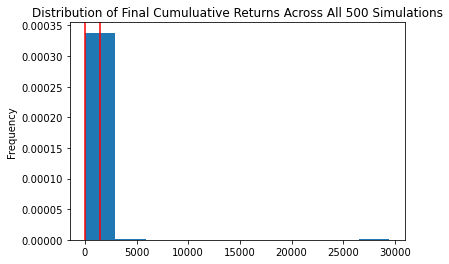

In [69]:
ours_ten_years_simulation.plot_distribution()

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

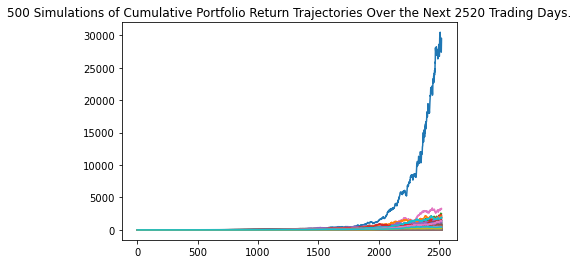

In [68]:
ours_ten_years_simulation.plot_simulation()

In [78]:
# Consolidate and Sumarize the 10-year Monte Carlo summary statistics (OURS vs. COMPS)
MC_forecast_10yr  = pd.DataFrame({'OURS':ours_ten_years_simulation.summarize_cumulative_return()})
MC_forecast_10yr = MC_forecast_10yr.join(pd.DataFrame({'ETFS':etf_ten_years_simulation.summarize_cumulative_return()}))
MC_forecast_10yr = MC_forecast_10yr.join(pd.DataFrame({'SPY':spy_ten_years_simulation.summarize_cumulative_return()}))
MC_forecast_10yr = MC_forecast_10yr.join(pd.DataFrame({'QQQ':qqq_ten_years_simulation.summarize_cumulative_return()}))
MC_forecast_10yr = MC_forecast_10yr.join(pd.DataFrame({'GLD':gld_ten_years_simulation.summarize_cumulative_return()}))
MC_forecast_10yr.iloc[8:10]

,OURS,ETFS,SPY,QQQ,GLD
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,315.347920,13.877895,11.721062,45.761956,3.229222
std,1356.086171,18.510605,16.870006,47.930563,1.841952
min,6.595019,0.308895,0.438375,1.860615,0.364852
25%,63.512742,5.267784,4.472366,16.853377,2.014422
50%,137.748396,9.245263,8.073615,30.659559,2.780318
75%,293.263871,16.226919,14.467639,55.124420,3.913972
max,29462.875530,297.671695,317.733387,506.160312,13.957448
95% CI Lower,13.817310,1.296673,1.612989,4.950681,1.021603
95% CI Upper,1420.212359,48.344110,39.240372,170.424122,8.282655


- based on MC 10 year simulation result: Our Portfolio is expected perform best among 5 comparisons based on MC simulation result:
There is a 95% chance that our portfolio over the 10 years will end within in the price upside potential range of 13.8% and 1420.21%
while 2nd best (QQQ) has 4.95% and 170.42%